In [39]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2


In [40]:
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [41]:
print(os.listdir(r"C:\Users\hp\Downloads\Images"))

['test', 'train']


In [42]:
SIZE = 256

In [43]:
train_images = []
train_labels = [] 


In [44]:
for directory_path in glob.glob(r"C:\Users\hp\Downloads\Images\train\*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpeg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

covid
C:\Users\hp\Downloads\Images\train\covid\f.jpeg
C:\Users\hp\Downloads\Images\train\covid\g.jpeg
C:\Users\hp\Downloads\Images\train\covid\h.jpeg
C:\Users\hp\Downloads\Images\train\covid\i.jpeg
C:\Users\hp\Downloads\Images\train\covid\l.jpeg
C:\Users\hp\Downloads\Images\train\covid\m.jpeg
C:\Users\hp\Downloads\Images\train\covid\n.jpeg
C:\Users\hp\Downloads\Images\train\covid\o.jpeg
C:\Users\hp\Downloads\Images\train\covid\p.jpeg
C:\Users\hp\Downloads\Images\train\covid\q.jpeg
C:\Users\hp\Downloads\Images\train\covid\r.jpeg
C:\Users\hp\Downloads\Images\train\covid\s.jpeg
C:\Users\hp\Downloads\Images\train\covid\t.jpeg
non-covid
C:\Users\hp\Downloads\Images\train\non-covid\10.jpeg
C:\Users\hp\Downloads\Images\train\non-covid\11.jpeg
C:\Users\hp\Downloads\Images\train\non-covid\12.jpeg
C:\Users\hp\Downloads\Images\train\non-covid\13.jpeg
C:\Users\hp\Downloads\Images\train\non-covid\14.jpeg
C:\Users\hp\Downloads\Images\train\non-covid\15.jpeg
C:\Users\hp\Downloads\Images\train\non-cov

In [45]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)


In [46]:
train_images.shape

(73, 256, 256, 3)

In [47]:
train_labels.shape

(73,)

In [48]:
test_images = []
test_labels = [] 
for directory_path in glob.glob(r"C:\Users\hp\Downloads\Images\test\*"):
    Label = directory_path.split("\\")[-1]
    print(Label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpeg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(Label)

covid
non-covid


In [49]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [50]:
test_images.shape

(19, 256, 256, 3)

In [51]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [52]:
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded


In [53]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [54]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)


In [55]:
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))


In [56]:
for layer in VGG_model.layers:
 layer.trainable = False

In [57]:
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [58]:
feature_extractor=VGG_model.predict(x_train)

In [59]:
features = feature_extractor.reshape(feature_extractor.shape[0], -1)

In [60]:
X_for_RF = features

In [61]:
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [62]:
from sklearn.decomposition import PCA

In [63]:
pca = PCA(n_components=2)

In [64]:
X_train_pca = pca.fit_transform(X_for_RF)
X_test_pca = pca.transform(X_test_features)

In [65]:
from sklearn.neural_network import MLPClassifier
nn_model1=MLPClassifier(hidden_layer_sizes=50, activation='relu',solver='sgd', alpha=0.001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001)
nn_model2=MLPClassifier(hidden_layer_sizes=55, activation='relu',solver='adam', alpha=0.001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001)
nn_model3=MLPClassifier(hidden_layer_sizes=60, activation='relu',solver='sgd', alpha=0.001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001)
nn_model4=MLPClassifier(hidden_layer_sizes=65, activation='relu',solver='sgd', alpha=0.001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001)
nn_model5=MLPClassifier(hidden_layer_sizes=70, activation='relu',solver='sgd', alpha=0.001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001)
nn_model6=MLPClassifier(hidden_layer_sizes=75, activation='relu',solver='sgd', alpha=0.001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001)
nn_model7=MLPClassifier(hidden_layer_sizes=80, activation='relu',solver='sgd', alpha=0.001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001)
nn_model8=MLPClassifier(hidden_layer_sizes=85, activation='relu',solver='sgd', alpha=0.001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001)
nn_model9=MLPClassifier(hidden_layer_sizes=90, activation='relu',solver='sgd', alpha=0.001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001)
nn_model10=MLPClassifier(hidden_layer_sizes=95, activation='relu',solver='sgd', alpha=0.001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001)
nn_model11=MLPClassifier(hidden_layer_sizes=100, activation='relu',solver='sgd', alpha=0.001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001)
nn_model12=MLPClassifier(hidden_layer_sizes=97, activation='relu',solver='sgd', alpha=0.001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001)
nn_model13=MLPClassifier(hidden_layer_sizes=93, activation='relu',solver='sgd', alpha=0.001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001)
nn_model14=MLPClassifier(hidden_layer_sizes=87, activation='relu',solver='sgd', alpha=0.001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001)
nn_model15=MLPClassifier(hidden_layer_sizes=83, activation='relu',solver='sgd', alpha=0.001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001)
nn_model16=MLPClassifier(hidden_layer_sizes=77, activation='relu',solver='sgd', alpha=0.001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001)
nn_model17=MLPClassifier(hidden_layer_sizes=73, activation='relu',solver='sgd', alpha=0.001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001)
nn_model18=MLPClassifier(hidden_layer_sizes=67, activation='relu',solver='sgd', alpha=0.001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001)
nn_model19=MLPClassifier(hidden_layer_sizes=63, activation='relu',solver='sgd', alpha=0.001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001)
nn_model20=MLPClassifier(hidden_layer_sizes=57, activation='relu',solver='sgd', alpha=0.001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001)

In [66]:
nn_model1.fit(X_train_pca, y_train)
nn_model2.fit(X_train_pca, y_train)
nn_model3.fit(X_train_pca, y_train)
nn_model4.fit(X_train_pca, y_train)
nn_model5.fit(X_train_pca, y_train)
nn_model6.fit(X_train_pca, y_train)
nn_model7.fit(X_train_pca, y_train)
nn_model8.fit(X_train_pca, y_train)
nn_model9.fit(X_train_pca, y_train)
nn_model10.fit(X_train_pca, y_train)
nn_model11.fit(X_train_pca, y_train)
nn_model12.fit(X_train_pca, y_train)
nn_model13.fit(X_train_pca, y_train)
nn_model14.fit(X_train_pca, y_train)
nn_model15.fit(X_train_pca, y_train)
nn_model16.fit(X_train_pca, y_train)
nn_model17.fit(X_train_pca, y_train)
nn_model18.fit(X_train_pca, y_train)
nn_model19.fit(X_train_pca, y_train)
nn_model20.fit(X_train_pca, y_train)

C:\Users\hp\.conda\envs\DeepLearning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\.conda\envs\DeepLearning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\.conda\envs\DeepLearning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.001, hidden_layer_sizes=57, solver='sgd')

In [67]:
ensemble = [nn_model1,nn_model2,nn_model3,nn_model4,nn_model5,nn_model6,nn_model7,nn_model8,nn_model9,nn_model10,nn_model11,nn_model12,nn_model13,nn_model14,nn_model15,nn_model16,nn_model17,nn_model18,nn_model19,nn_model20]




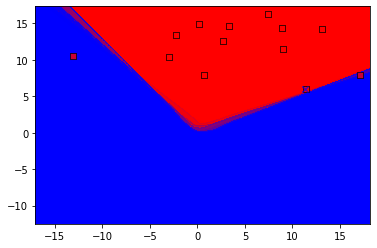

In [69]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=[cmap(idx)],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

for model in ensemble:
 plot_decision_regions(X_train_pca, y_train, classifier=model)
plt.show()